<a href="https://colab.research.google.com/github/vatsbalar22/Stock-prediction-ML-DL-MLOps-Flask/blob/main/colab_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model train with Deep Learnig

# Data extract through API

In [5]:
# from alpha_vantage.timeseries import TimeSeries
# api_key = 'RDW63LUED9U3S55M'
# symbol = 'RELIANCE.BSE'

# def get_stock_data(symbol, api_key):
#     ts = TimeSeries(key=api_key, output_format='pandas')
#     data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
#     return data
# def prepare_data(data):
#     data = data[['1. open', '2. high', '3. low', '4. close', '5. volume']]
#     data.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
#     return data

# data = get_stock_data(symbol,api_key)
# df = prepare_data(data)



In [6]:
# Get accurate data using yfinance library
# Give symbol and start and end date

import yfinance as yf
from datetime import datetime

symbol='RELIANCE.BO'
start_date = "2005-01-03"
end_date = datetime.today().strftime('%Y-%m-%d')
df = yf.download(symbol ,start=start_date , end= end_date)


[*********************100%%**********************]  1 of 1 completed


### DATA Preprocessing if we are using yfinance library

In [7]:
df =df.reset_index()
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,130.012497,136.125000,130.012497,135.774994,99.178894,11731288
1,2005-01-04,133.750000,136.237503,132.375000,132.699997,96.932709,9965116
2,2005-01-05,131.375000,133.500000,129.062500,132.475006,96.768379,16794452
3,2005-01-06,131.250000,134.125000,130.649994,131.487503,96.047035,13319768
4,2005-01-07,132.000000,136.875000,131.887497,135.212494,98.768005,16809884
...,...,...,...,...,...,...,...
4701,2024-02-29,2931.050049,2958.000000,2909.550049,2924.750000,2924.750000,192376
4702,2024-03-01,2916.699951,2999.000000,2916.699951,2986.000000,2986.000000,544407
4703,2024-03-04,2981.000000,3024.800049,2975.050049,3011.600098,3011.600098,139795
4704,2024-03-05,3011.699951,3011.699951,2973.000000,2998.300049,2998.300049,70928


In [8]:
# Add more features to improve accuracy and drop null value

df['Tommorow']= df['Close'].shift(1)
df.dropna(inplace=True)
df['Target']=(df['Close']>df['Tommorow']).astype(int)

In [9]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Tommorow,Target
1,2005-01-04,133.750000,136.237503,132.375000,132.699997,96.932709,9965116,135.774994,0
2,2005-01-05,131.375000,133.500000,129.062500,132.475006,96.768379,16794452,132.699997,0
3,2005-01-06,131.250000,134.125000,130.649994,131.487503,96.047035,13319768,132.475006,0
4,2005-01-07,132.000000,136.875000,131.887497,135.212494,98.768005,16809884,131.487503,1
5,2005-01-10,136.949997,138.449997,132.562500,133.375000,97.425781,8666480,135.212494,0
...,...,...,...,...,...,...,...,...,...
4701,2024-02-29,2931.050049,2958.000000,2909.550049,2924.750000,2924.750000,192376,2909.000000,1
4702,2024-03-01,2916.699951,2999.000000,2916.699951,2986.000000,2986.000000,544407,2924.750000,1
4703,2024-03-04,2981.000000,3024.800049,2975.050049,3011.600098,3011.600098,139795,2986.000000,1
4704,2024-03-05,3011.699951,3011.699951,2973.000000,2998.300049,2998.300049,70928,3011.600098,0


#Data visualization

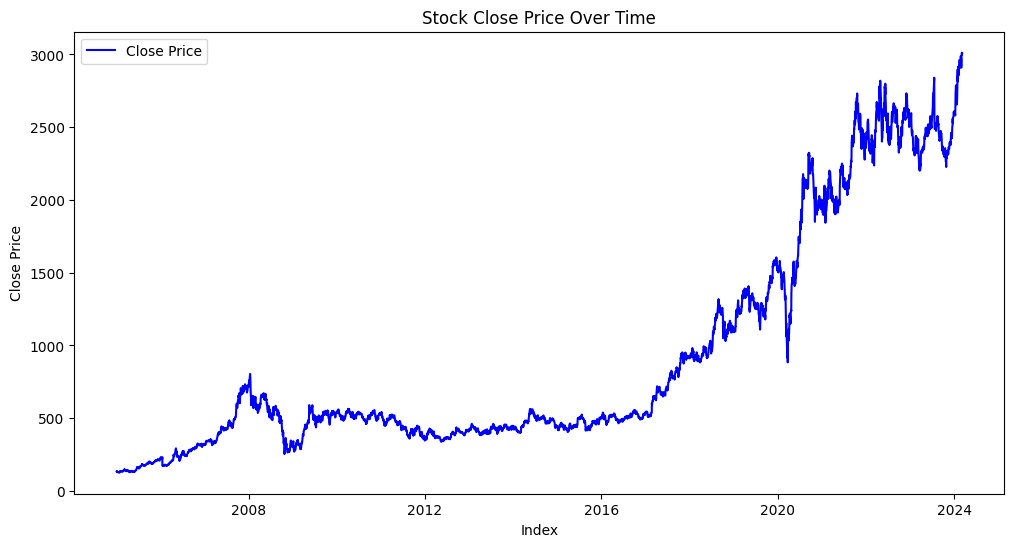

In [10]:
import matplotlib.pyplot as plt

# Plotting the closing prices using numerical index
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Stock Close Price Over Time')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()


# Data Analysis

In [11]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Tommorow,Target
count,4705,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4.705000e+03,4705.000000,4705.000000
mean,2014-07-24 07:21:38.448459264,914.364816,924.769085,903.288967,913.585056,878.645973,2.950745e+06,912.975029,0.515197
min,2005-01-04 00:00:00,126.250000,127.587502,124.550003,125.349998,91.563797,4.087400e+04,125.349998,0.000000
25%,2009-10-16 00:00:00,422.700012,427.500000,417.250000,421.837494,376.001129,4.180400e+05,421.774994,0.000000
50%,2014-07-17 00:00:00,514.500000,520.875000,507.750000,514.049988,466.146942,8.613200e+05,513.875000,1.000000
75%,2019-05-09 00:00:00,1253.000000,1271.000000,1235.500000,1252.699951,1244.542114,2.512454e+06,1252.000000,1.000000
max,2024-03-06 00:00:00,3011.699951,3024.800049,2975.050049,3011.600098,3011.600098,7.946226e+08,3011.600098,1.000000
std,NaN,769.425303,776.450851,761.630879,768.756085,783.927896,2.051122e+07,768.233989,0.499822


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4705 entries, 1 to 4705
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4705 non-null   datetime64[ns]
 1   Open       4705 non-null   float64       
 2   High       4705 non-null   float64       
 3   Low        4705 non-null   float64       
 4   Close      4705 non-null   float64       
 5   Adj Close  4705 non-null   float64       
 6   Volume     4705 non-null   int64         
 7   Tommorow   4705 non-null   float64       
 8   Target     4705 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 367.6 KB


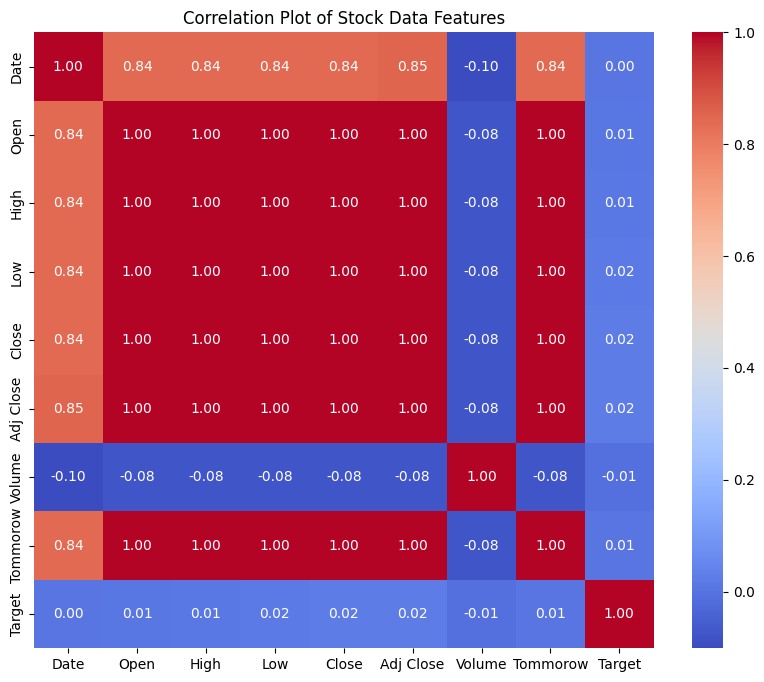

In [13]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot of Stock Data Features')
plt.show()


In [14]:
# Drop the 'Date' column from the DataFrame
df.drop(df.columns[[0,5]] , axis=1 , inplace=True)


In [15]:
df

,Open,High,Low,Close,Volume,Tommorow,Target
1,133.750000,136.237503,132.375000,132.699997,9965116,135.774994,0
2,131.375000,133.500000,129.062500,132.475006,16794452,132.699997,0
3,131.250000,134.125000,130.649994,131.487503,13319768,132.475006,0
4,132.000000,136.875000,131.887497,135.212494,16809884,131.487503,1
5,136.949997,138.449997,132.562500,133.375000,8666480,135.212494,0
...,...,...,...,...,...,...,...
4701,2931.050049,2958.000000,2909.550049,2924.750000,192376,2909.000000,1
4702,2916.699951,2999.000000,2916.699951,2986.000000,544407,2924.750000,1
4703,2981.000000,3024.800049,2975.050049,3011.600098,139795,2986.000000,1
4704,3011.699951,3011.699951,2973.000000,2998.300049,70928,3011.600098,0


In [16]:

# Split the data into features (X) and target (y)
x = df.drop(columns=['Target'])  # Features are all columns except 'Market_High_Indicator'
y = df['Target']  # Target column is 'Market_High_Indicator'

# Now, you can use X and y for further processing, such as training and testing your model

#Model training

In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Now, you can use X_train, X_test, y_train, and y_test for training and evaluating your model

In [18]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train_scale = scale.fit_transform(X_train)



In [19]:
X_train.shape

(3764, 6)

In [20]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_dim=6),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])



2024-03-07 11:08:45.540612: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 11:08:45.540737: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 11:08:45.973931: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-07 11:08:46.845362: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-07 11:08:52.204952: W tensorflow/compiler/tf2

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4673 (18.25 KB)
Trainable params: 4673 (18.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
95/95 [==============================] - 1s 4ms/step - loss: 38489.6250 - accuracy: 0.5168 - val_loss: 61843.4883 - val_accuracy: 0.5126
Epoch 2/10
95/95 [==============================] - 0s 1ms/step - loss: 27235.3750 - accuracy: 0.5271 - val_loss: 79848.5391 - val_accuracy: 0.4874
Epoch 3/10
95/95 [==============================] - 0s 2ms/step - loss: 65092.1289 - accuracy: 0.4899 - val_loss: 7233.1646 - val_accuracy: 0.4861
Epoch 4/10
95/95 [==============================] - 0s 1ms/step - loss: 29248.0645 - accuracy: 0.4975 - val_loss: 1362.4708 - val_accuracy: 0.5046
Epoch 5/10
95/95 [==============================] - 0s 2ms/step - loss: 1969.3268 - accuracy: 0.5178 - val_loss: 486.2096 - val_accuracy: 0.5126
Epoch 6/10
95/95 [==============================] - 0s 1ms/step - loss: 63632.7500 - accuracy: 0.4968 - val_loss: 63324.7266 - val_accuracy: 0.4874
Epoch 7/10
95/95 [==============================] - 0s 2ms/step - loss: 34242.0977 - accuracy: 0.4952 - val_loss: 267

#Predict next day high

In [23]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Your original array
last_row_features = df.drop(columns=['Target']).iloc[-1]
last_row_features_array = np.array(last_row_features)

# Reshape the array to a 2D array (required by MinMaxScaler)
last_row_features_array = last_row_features_array.reshape(-1, 1)

# Create the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
features_scaled_array = scaler.fit_transform(last_row_features_array)
features_scaled_array_reshaped = features_scaled_array.reshape(1, -1)

In [24]:
# Make predictions
next_day_prediction = model.predict(features_scaled_array_reshaped)

# Convert the prediction to binary (0 or 1)
next_day_prediction_binary = 1 if next_day_prediction > 0.5 else 0

print("Predicted Market High Indicator for the Next Day:", next_day_prediction_binary)


1/1 [==============================] - 0s 90ms/step


Predicted Market High Indicator for the Next Day: 1


In [ ]:
import joblib



In [25]:
# from sklearn.linear_model import LogisticRegression

# # Initialize the Logistic Regression model
# model = LogisticRegression()

# # Train the model on the training data
# model.fit(X_train, y_train)

# # Once trained, you can use the model to make predictions on the test data
# y_pred = model.predict(X_test)



In [26]:
# from sklearn.metrics import accuracy_score

# # Calculate accuracy score
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


In [27]:
# # Extract features from the last row of your dataset
# last_row_features = df.drop(columns=['Market_High_Indicator']).iloc[-1]

# # Reshape the features array as scikit-learn expects a 2D array
# last_row_features = last_row_features.values.reshape(1, -1)

# # Predict the next day's market high indicator
# next_day_prediction = model.predict(last_row_features)

# print("Predicted Market High Indicator for the Next Day:", next_day_prediction[0])


In [28]:
# # Predict the next day's market high indicator
# last_row_features = df.drop(columns=['Market_High_Indicator']).iloc[-1]
# last_row_features = last_row_features.values.reshape(1, -1)
# next_day_prediction = model.predict(last_row_features)

# # Convert the prediction to binary (0 or 1)
# next_day_prediction_binary = 1 if next_day_prediction > 0.5 else 0

# print("Predicted Market High Indicator for the Next Day:", next_day_prediction_binary)
